Stel, een klant komt naar je toe en vraagt of je overeenkomsten kan vinden tussen klanten. Deze overeenkomsten moeten alle klanten groeperen om zo de groepen beter te kunnen benaderen met bv. gepersonaliseerde reclame of aanbiedingen.

Één mogelijke manier is door gebruik te maken van een clustering algoritme. Omdat de dataset klein is en verklaarbaarheid van de data een grote rol speelt, maken we gebruik van hiërarchische clustering analyse.

Laten we beginnen met het importeren van de dataset.

In [54]:
import pandas as pd

# Substitute the path_to_file content by the path to your shopping-data.csv file 
path_to_file = 'gender_equality.csv'
gender_eq = pd.read_csv(path_to_file, sep = ';')

In [55]:
gender_eq.shape

(28, 8)

In [56]:
gender_eq.columns

Index(['Country', 'Index', 'Work', 'Money', 'Knowledge', 'Time', 'Power',
       'Health'],
      dtype='object')

Laten we even wat verder induiken op de "spending habits" van de klanten door de spending score in een histogram te plaatsen.

<AxesSubplot: >

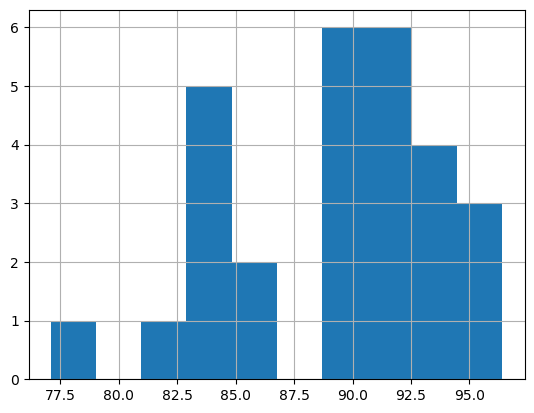

In [58]:
gender_eq['Health'].hist()

In [59]:
# transpose() transposes the table, making it easier for us to compare values
gender_eq.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,28.0,50.960714,11.352348,35.3,41.550,50.20,56.275,74.3
Work,28.0,66.407143,8.177156,49.9,60.900,66.40,71.825,82.0
Money,28.0,65.489286,14.542437,39.0,54.225,68.55,77.225,90.9
Knowledge,28.0,47.882143,13.039116,28.8,36.300,48.15,53.800,75.1
Time,28.0,38.200000,15.856486,17.3,23.875,36.65,48.950,71.3
Power,28.0,35.132143,15.232496,12.2,24.775,32.60,40.250,74.3
Health,28.0,89.232143,4.648381,77.1,84.800,90.35,92.575,96.4


In [60]:
gender_eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    28 non-null     object 
 1   Index      28 non-null     float64
 2   Work       28 non-null     float64
 3   Money      28 non-null     float64
 4   Knowledge  28 non-null     float64
 5   Time       28 non-null     float64
 6   Power      28 non-null     float64
 7   Health     28 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.9+ KB


In [61]:
gender_eq.head() 

,Country,Index,Work,Money,Knowledge,Time,Power,Health
0,SE,74.3,78.6,80.2,66.3,63.9,74.3,93.1
1,DK,73.6,81.6,79.2,75.1,64.9,60.0,91.8
2,FI,73.4,82.0,78.4,67.0,63.8,68.8,89.9
3,NL,69.7,73.1,82.5,65.5,71.3,52.2,94.7
4,UK,60.4,76.6,74.3,68.8,43.2,35.2,95.4


In [66]:
gender_eq['Index'].unique() #Niet zo interessant hier omdat het hele df gevuld is met indexen

array([74.3, 73.6, 73.4, 69.7, 60.4, 59.6, 57.1, 56. , 55.2, 54. , 51.6,
       50.7, 50.4, 50. , 44.4, 44.1, 43.6, 42. , 41.6, 41.4, 41.3, 40.9,
       40. , 37. , 35.3])

In [68]:
gender_eq['Index'].value_counts(normalize=True) 
#Zet je 'normalize' op 'False' en je runt dan de cel, dan krijg je de aantallen klanten: 112 vrouwen, 88 mannen

40.9    0.071429
54.0    0.071429
44.4    0.071429
74.3    0.035714
50.0    0.035714
37.0    0.035714
40.0    0.035714
41.3    0.035714
41.4    0.035714
41.6    0.035714
42.0    0.035714
43.6    0.035714
44.1    0.035714
50.4    0.035714
73.6    0.035714
50.7    0.035714
51.6    0.035714
55.2    0.035714
56.0    0.035714
57.1    0.035714
59.6    0.035714
60.4    0.035714
69.7    0.035714
73.4    0.035714
35.3    0.035714
Name: Index, dtype: float64

In [69]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = gender_eq['Index']
gender_eq['Index_Groups'] = pd.cut(x=col, bins=intervals)

# To be able to look at the result stored in the variable
gender_eq['Index_Groups']

0              NaN
1              NaN
2              NaN
3     (60.0, 70.0]
4     (60.0, 70.0]
5     (50.0, 60.0]
6     (50.0, 60.0]
7     (50.0, 60.0]
8     (50.0, 60.0]
9     (50.0, 60.0]
10    (50.0, 60.0]
11    (50.0, 60.0]
12    (50.0, 60.0]
13    (40.0, 50.0]
14    (40.0, 50.0]
15    (40.0, 50.0]
16    (40.0, 50.0]
17    (40.0, 50.0]
18    (40.0, 50.0]
19    (40.0, 50.0]
20    (40.0, 50.0]
21    (40.0, 50.0]
22    (40.0, 50.0]
23    (40.0, 50.0]
24    (30.0, 40.0]
25    (30.0, 40.0]
26    (30.0, 40.0]
27    (50.0, 60.0]
Name: Index_Groups, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [70]:
gender_eq.groupby('Index_Groups')['Index_Groups'].count()

Index_Groups
(15, 20]     0
(20, 30]     0
(30, 40]     3
(40, 50]    11
(50, 60]     9
(60, 70]     2
Name: Index_Groups, dtype: int64

In [71]:
# The _oh means one-hot
gender_eq_oh = pd.get_dummies(customer_data)
# Display the one-hot encoded dataframe
gender_eq_oh

,Index,Work,Money,Knowledge,Time,Power,Health,Country_AT,Country_BE,Country_BG,...,Country_LV,Country_MT,Country_NL,Country_PL,Country_PT,Country_RO,Country_SE,Country_SI,Country_SK,Country_UK
0,74.3,78.6,80.2,66.3,63.9,74.3,93.1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,73.6,81.6,79.2,75.1,64.9,60.0,91.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73.4,82.0,78.4,67.0,63.8,68.8,89.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69.7,73.1,82.5,65.5,71.3,52.2,94.7,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,60.4,76.6,74.3,68.8,43.2,35.2,95.4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,59.6,66.4,79.3,54.7,45.3,45.2,94.1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,57.1,67.0,75.9,49.4,35.8,50.3,90.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,56.0,69.1,70.2,51.4,49.1,36.0,88.7,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,55.2,71.0,77.0,52.8,53.4,26.5,96.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,54.0,61.3,60.7,53.5,33.8,47.2,90.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# customer_data_oh = customer_data_oh.drop(['Age'], axis=1)
# customer_data_oh.shape 

(200, 11)

Het voordeel van one-hot-encoding is het versimpelen van het weergeven van kolom waardes. Het is makkelijk te lezen en te begrijpen. Het nadeel is dat er nu 8 EXTRA kolommen aan zijn gemaakt in de dataset. 

Hiermee kan een dendrogram gemaakt worden, maar eerst is het van belang om te kijken welke oorspronkelijke features tegenover elkaar geplot kunnen worden, waarbij clusters tevoorschijn kunnen komen.

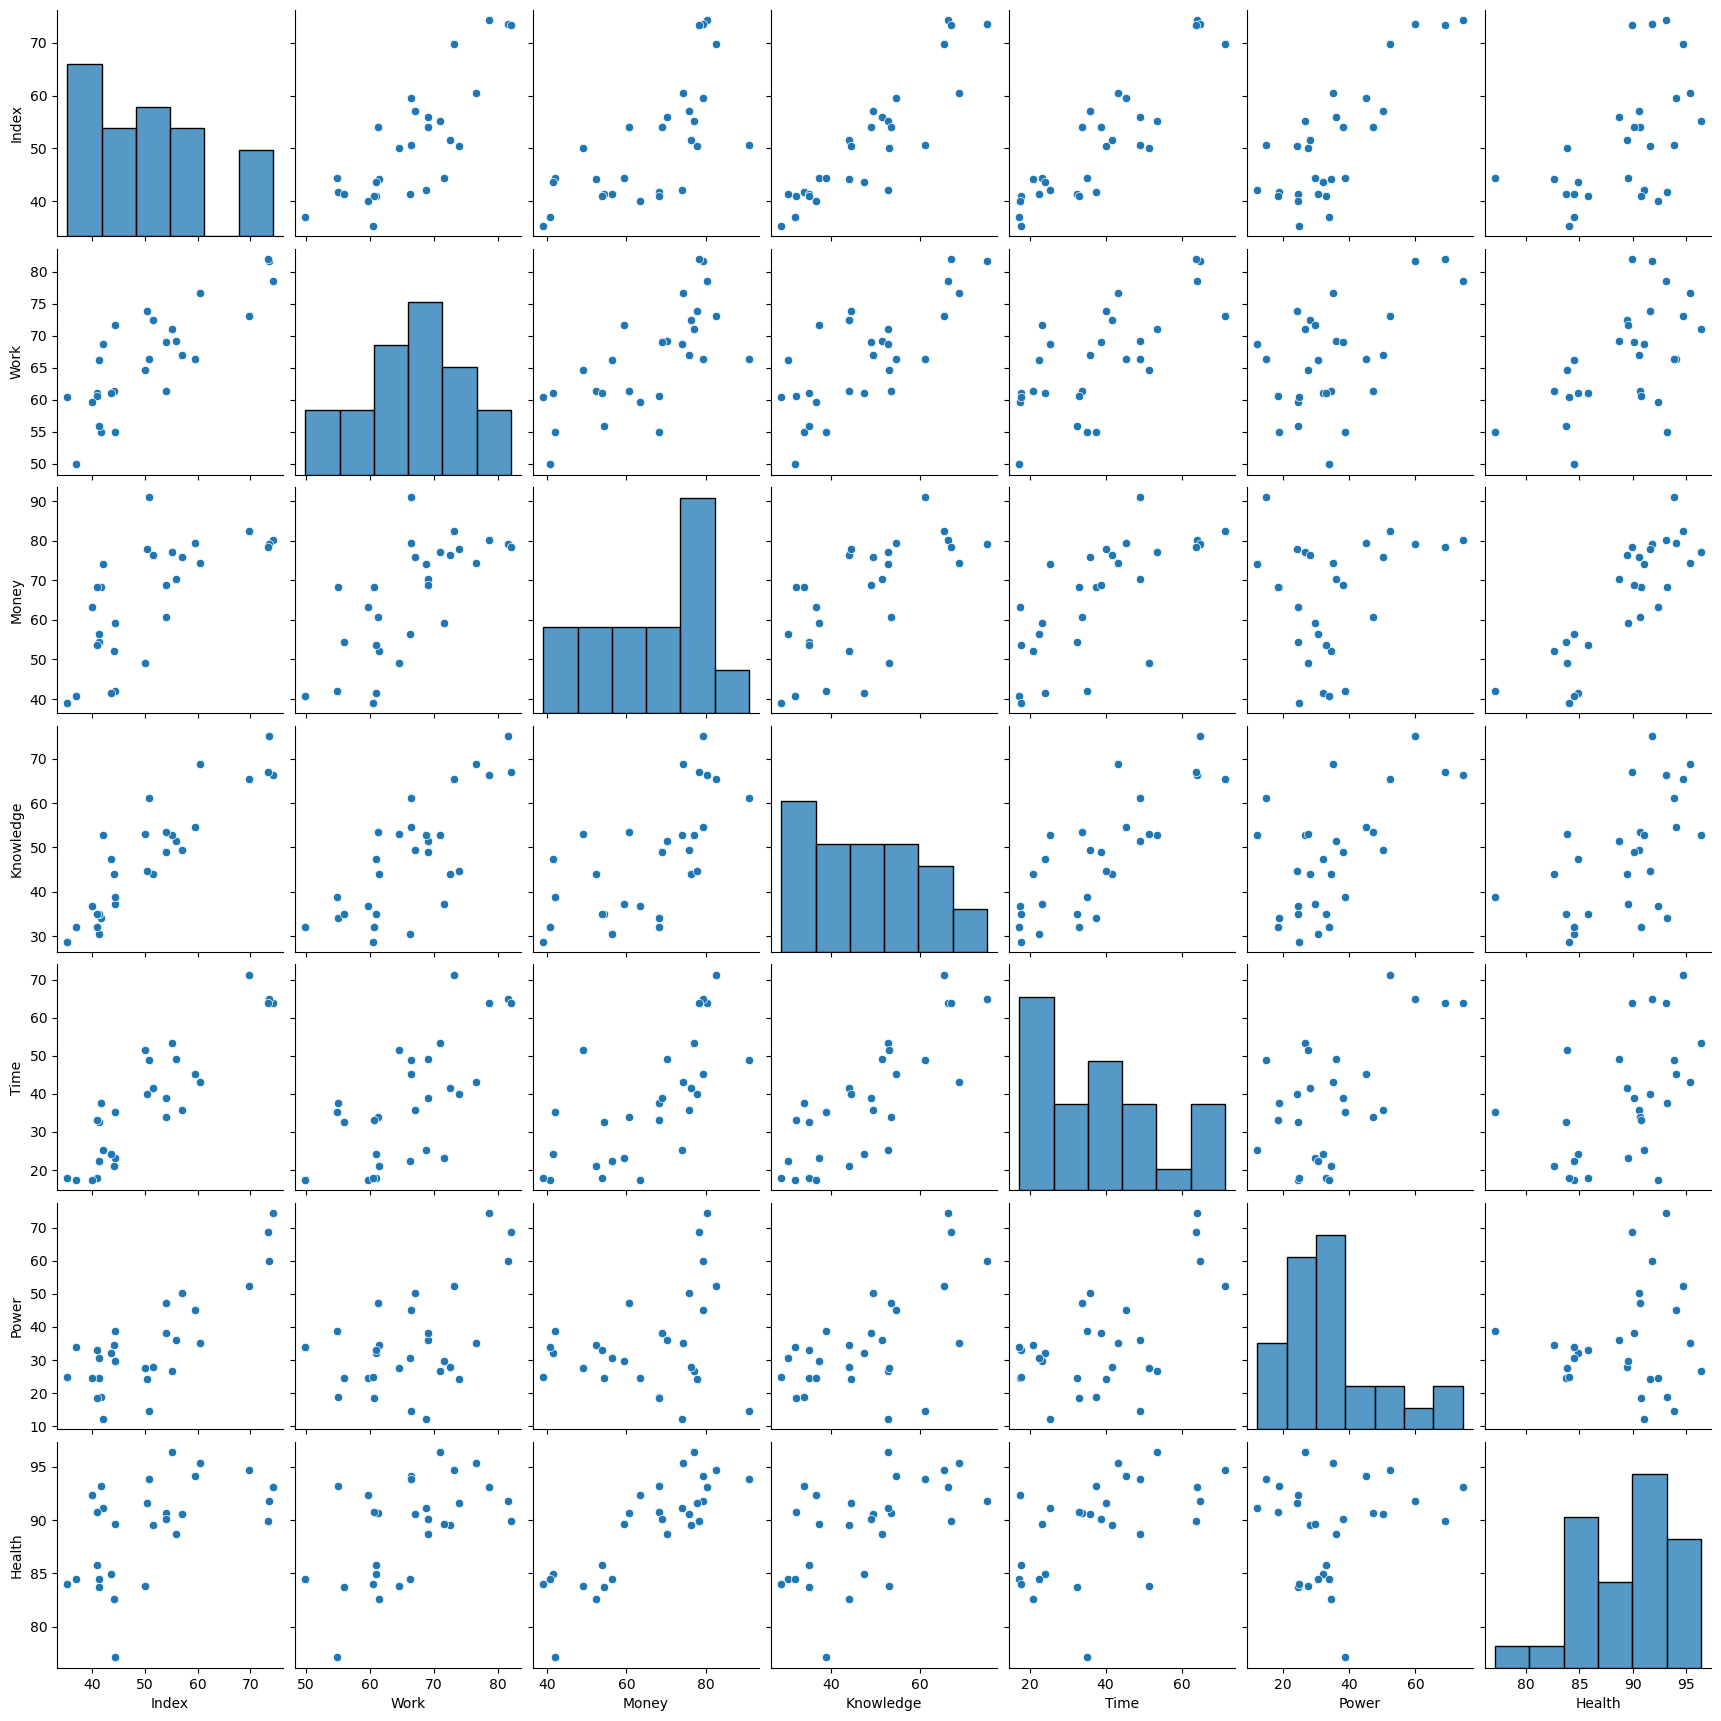

In [72]:
import seaborn as sns
# Seaborn is een data-visualisatie package

# Dropping CustomerID column from data 
#customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(gender_eq)

<AxesSubplot: xlabel='Work', ylabel='Knowledge'>

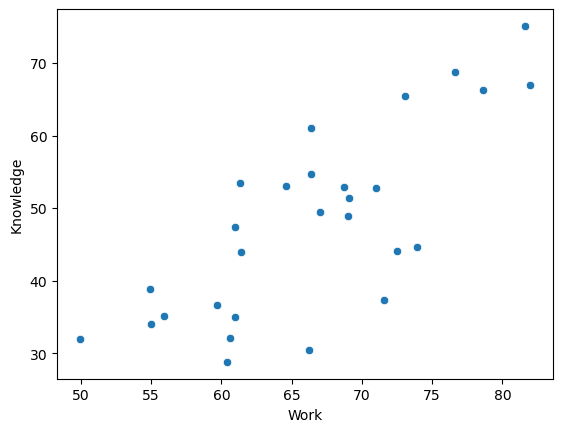

In [84]:
sns.scatterplot(x= gender_eq['Work'],
                y= gender_eq['Knowledge'])

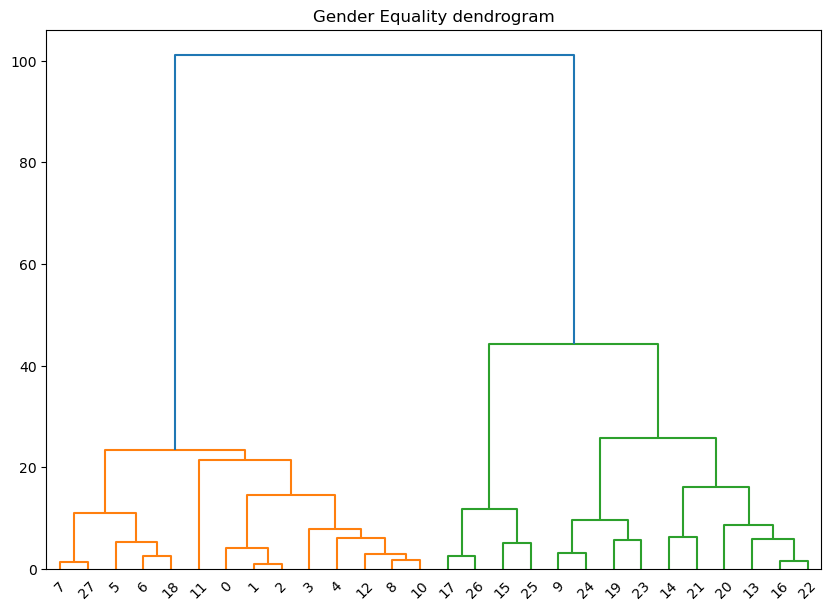

In [85]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Gender Equality dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = gender_eq_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Het vinden van het aantal clusters is een beetje puzzelen. Er moet gekeken worden naar de grootste horizontale vlakte in een Dendrogram waar de grootste verticale lijnen door passeren. Twee mogelijke opties hierin zijn of een lijn trekken op een y van 40, of op een y van rond de 20. De lijn die door y = 40 passeert heeft echter niet de grootste verticale lijnen door zich heen lopen. (Info uit origineel, gaat hier niet op: Daarnaast hebben we met de Seaborn plots al een visuele indicatie van 5 clusters gezien.) Dit betekent dat we een lijn trekken op y = 20.

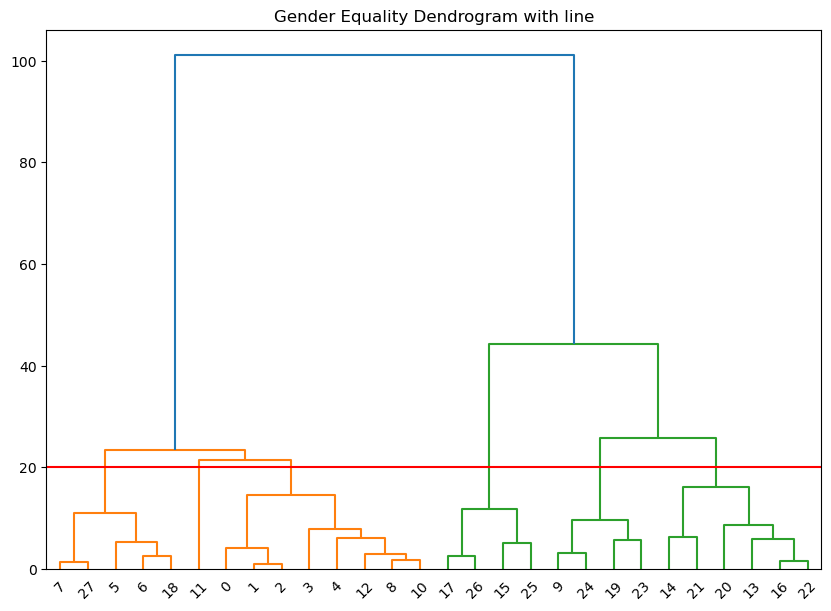

In [86]:
plt.figure(figsize=(10, 7))
plt.title("Gender Equality Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 20, color = 'r', linestyle = '-')


In [76]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_|

array([1, 1, 1, 1, 1, 4, 4, 4, 1, 3, 1, 5, 1, 0, 0, 2, 0, 2, 4, 3, 0, 0,
       0, 3, 3, 2, 2, 4])

Text(0.5, 1.0, 'Labeled Gender Equality, relation Work and Knowledge')

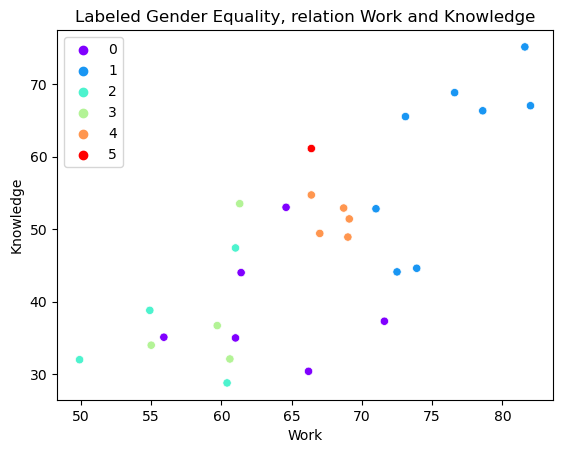

In [87]:
data_labels = clustering_model.labels_
sns.scatterplot(x=gender_eq['Work'], 
                y=gender_eq['Knowledge'], 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Gender Equality, relation Work and Knowledge')

# x= gender_eq['Health'],
#                 y= gender_eq['Knowledge']

In [ ]:
# In eerste instantie een cluster-plot gemaakt van Health vs Knowledge. Dat gaf geen zinnig scatterplot: alle kleuren liepen door elkaar heen
# Toen een plot gemaakt van Time vs Power - dit geeft eigenlijk geen zinniger resultaat
# Tenslotte nog een plot Work vs Knowledge - ook geen zinnig resultaat